<a href="https://colab.research.google.com/github/ramircar2020/BCtechCopilot/blob/main/TP_Variaci%C3%B3n_Temp_PyE_2025_RAMIREZ_MIERS__carlos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP: Variación de Temperatura

## Iniciando una rutina típica de manejo de datos

En este trabajo se analizará un dataset mediante una rutina practica en donde utilizaremos algunas las funciones aprendidas.  

Una vez obtenidos los datos hay que hacer filtrado, depuración, preprocesamiento, consolidar la info a utilizar de una base simple para analisis y extraer lo que realmente necesitamos. Para luego utilizaremos como datos para diferentes gráficas.

Utilizaremos una base de datos que habla sobre el variación de temperatura producto de cambios climáticos, obtenida de Kaggle. Obtenbeidos de [Global Land Temperature by Country](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data).

### Configuramos Google Colab y librerias

En este caso configuramos google colab, pero si trabajasemos con Jupyter Notebook deberiamos configurar nuestro ambiente de trabajo.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de Archivo Local

para trabajar en forma Offline agregamos las siguientes lineas para realizar Carga Manual de dataset.(previamente bajados a nuestra PC o dispositivo)

In [2]:
from google.colab import files

# Esto abre un diálogo para subir archivos
uploaded = files.upload()


Saving GlobalLandTemperaturesByCountry.csv to GlobalLandTemperaturesByCountry.csv


### Conociendo nuestro dataframe

Leemos nuestro dataset, lo guardamos en una variable para luego reconocer las labels que tiene el dataframe.

In [3]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


Tenemos columnas con los nombres de los paises, temperaturas promedio, fechas. Tambien observamos que hay datos nulos NaN. Estos se deberán ir limpiando a medida que avancemos en nuestro código.

Veamos el tamaño de la base de datos

In [4]:
df_temp.shape

(577462, 4)

Veamos como esta compuesta nuestra base de datos, analizando mas informacion de la misma

In [5]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


Veamos los paises que tiene nuestra base de datos.

In [6]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

### Mejorando nuestro dataframe

Mejoremos el formato de nuestra base de datos. En este caso creemos una variable de tipo tiempo, de nuestra columna de tiempo.

In [7]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

,year
0,1743-11-01
1,1743-12-01
2,1744-01-01
3,1744-02-01
4,1744-03-01
...,...
577457,2013-05-01
577458,2013-06-01
577459,2013-07-01
577460,2013-08-01


Veamos ahora la nueva variable creada y el tipo de dato que es la misma.

In [8]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  object        
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
 4   year                           577462 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 22.0+ MB


Tenemos muchas filas, las cuales no aporten un valor significativo a nuestro análisis, en este caso. Lo que haremos es aplicarle un filtro al dataframe y obtener las fechas mayores al año 2000.

In [9]:
idx = df_temp['year'] > pd.to_datetime('2000-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
3075,2000-02-01,-0.023,0.399,Åland,2000-02-01
3076,2000-03-01,0.615,0.429,Åland,2000-03-01
3077,2000-04-01,4.124,0.348,Åland,2000-04-01
3078,2000-05-01,8.557,0.447,Åland,2000-05-01
3079,2000-06-01,11.742,0.291,Åland,2000-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


Vemos que teniamos unas **577.462** filas en el dataframe original y con este filtro lo hemos reducido a **39852**. Ahora nuestro dataframe comienza en año 2000, esto pasa para todos los paises.

### Agrupando datos y graficando

Agrupemos por fecha y por pais, para encontrar un promedio anual de la temperatura. Calcularemos la media y la mediana para cada fecha por pais.

In [10]:
df_t_avg = df_temp.groupby(['Country',
                            pd.Grouper(key='year', freq='1YE')
                            ]).agg({'AverageTemperature': [np.mean, np.median]})
df_t_avg

<ipython-input-10-bbd2bcaaccb1>:3: FutureWarning: The provided callable <function mean at 0x7c947f7be340> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ]).agg({'AverageTemperature': [np.mean, np.median]})
<ipython-input-10-bbd2bcaaccb1>:3: FutureWarning: The provided callable <function median at 0x7c947ca0f600> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  ]).agg({'AverageTemperature': [np.mean, np.median]})


AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 2000-12-31          16.688182  18.4400
            2001-12-31          15.778083  16.3620
            2002-12-31          15.537667  16.4970
            2003-12-31          14.916000  15.4800
            2004-12-31          15.770917  14.6700
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[3402 rows x 2 columns]

Seleccionemos algun pais y grafiquemos los datos.

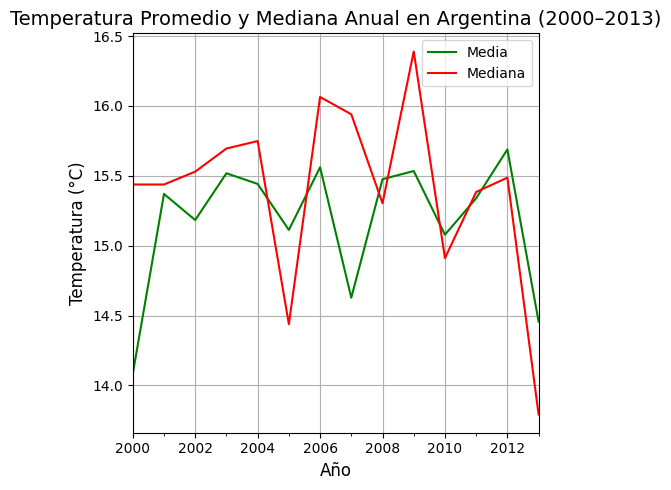

In [35]:
# Seleccionar los datos de Argentina
df_arg = df_t_avg.xs('Argentina')[[('AverageTemperature', 'mean'), ('AverageTemperature', 'median')]]
df_arg.columns = ['Media', 'Mediana']  # Cambiar nombres de columnas

# Graficar con nombres ya en español
ax = df_arg.plot(
    figsize=(5, 5),
    color=['green', 'red'],          # Colores de líneas
    label=['Media', 'Mediana']       # Etiquetas en la leyenda
)

# Títulos y etiquetas
plt.title('Temperatura Promedio y Mediana Anual en Argentina (2000–2013)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

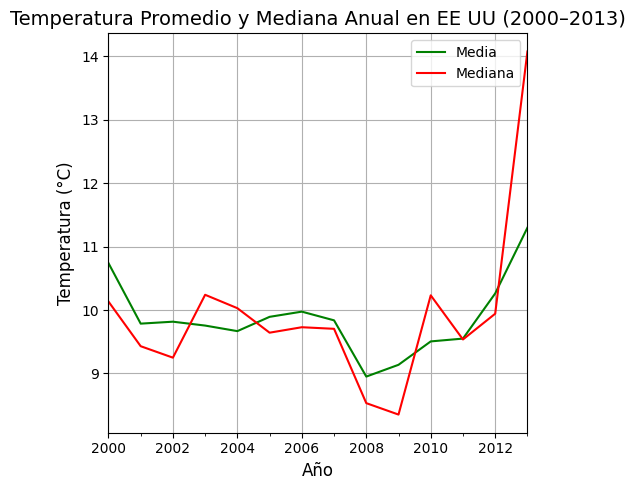

In [36]:
# Seleccionar los datos de EE UU
df_arg = df_t_avg.xs('United States')[[('AverageTemperature', 'mean'), ('AverageTemperature', 'median')]]
df_arg.columns = ['Media', 'Mediana']  # Cambiar nombres de columnas

# Graficar con nombres ya en español
ax = df_arg.plot(
    figsize=(5, 5),
    color=['green', 'red'],          # Colores de líneas
    label=['Media', 'Mediana']       # Etiquetas en la leyenda
)

# Títulos y etiquetas
plt.title('Temperatura Promedio y Mediana Anual en EE UU (2000–2013)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

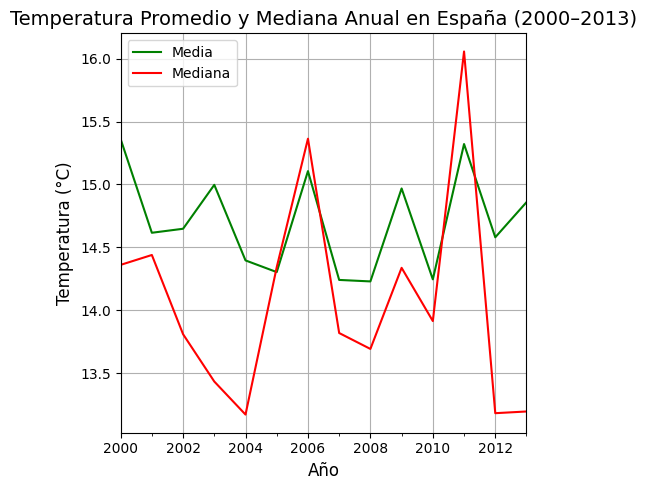

In [38]:
# Seleccionar los datos de España
df_arg = df_t_avg.xs('Spain')[[('AverageTemperature', 'mean'), ('AverageTemperature', 'median')]]
df_arg.columns = ['Media', 'Mediana']  # Cambiar nombres de columnas

# Graficar con nombres ya en español
ax = df_arg.plot(
    figsize=(5, 5),
    color=['green', 'red'],          # Colores de líneas
    label=['Media', 'Mediana']       # Etiquetas en la leyenda
)

# Títulos y etiquetas
plt.title('Temperatura Promedio y Mediana Anual en España (2000–2013)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

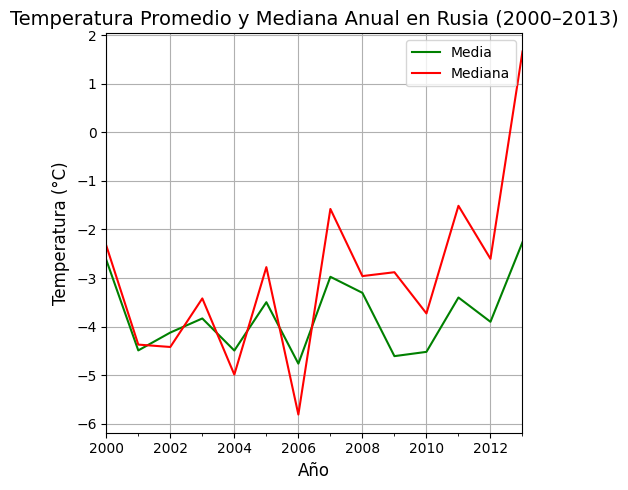

In [39]:
# Seleccionar los datos de Rusia
df_arg = df_t_avg.xs('Russia')[[('AverageTemperature', 'mean'), ('AverageTemperature', 'median')]]
df_arg.columns = ['Media', 'Mediana']  # Cambiar nombres de columnas

# Graficar con nombres ya en español
ax = df_arg.plot(
    figsize=(5, 5),
    color=['green', 'red'],          # Colores de líneas
    label=['Media', 'Mediana']       # Etiquetas en la leyenda
)

# Títulos y etiquetas
plt.title('Temperatura Promedio y Mediana Anual en Rusia (2000–2013)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Vemos una clara tendencia alcista en todos los paises que estudiamos. Esto quiere decir que la temperatura siempre va en aumento.

Preferiblemente es mejor trabajar con la mediana ya que no recibe sesgos por valores atipicos o fuera de rangos. Con esto haremos un dataset de mas facil manipulacion utilizando esta variable estadistica unicamente.

In [16]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,2000-12-31,18.4400
1,Afghanistan,2001-12-31,16.3620
2,Afghanistan,2002-12-31,16.4970
3,Afghanistan,2003-12-31,15.4800
4,Afghanistan,2004-12-31,14.6700
...,...,...,...
3397,Åland,2009-12-31,5.5765
3398,Åland,2010-12-31,4.7550
3399,Åland,2011-12-31,7.4990
3400,Åland,2012-12-31,6.2540


De la fecha, no interesa extraer el año para hacer mas facil nuestro estudio anual posterior

In [17]:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

,date
0,2000
1,2001
2,2002
3,2003
4,2004
...,...
3397,2009
3398,2010
3399,2011
3400,2012


Renombremos algunas columnas y para no tener que reasignar al dataframe utilicemos el parametro **inplace**

In [18]:
df_t_med.rename(columns={'median': 'temperature'}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,2000-12-31,18.4400,2000
1,Afghanistan,2001-12-31,16.3620,2001
2,Afghanistan,2002-12-31,16.4970,2002
3,Afghanistan,2003-12-31,15.4800,2003
4,Afghanistan,2004-12-31,14.6700,2004
...,...,...,...,...
3397,Åland,2009-12-31,5.5765,2009
3398,Åland,2010-12-31,4.7550,2010
3399,Åland,2011-12-31,7.4990,2011
3400,Åland,2012-12-31,6.2540,2012


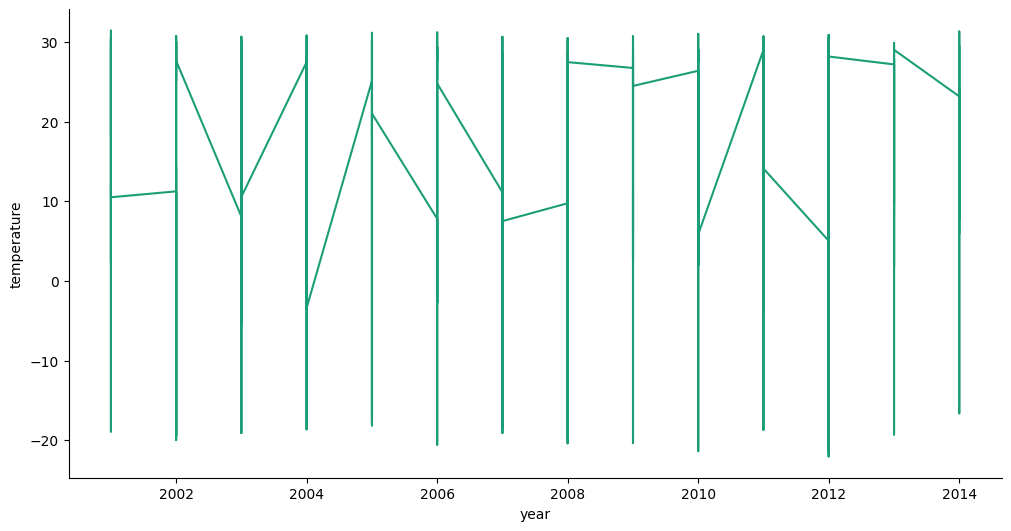

In [19]:
# @title year vs temperature

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['temperature']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_t_med.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('temperature')

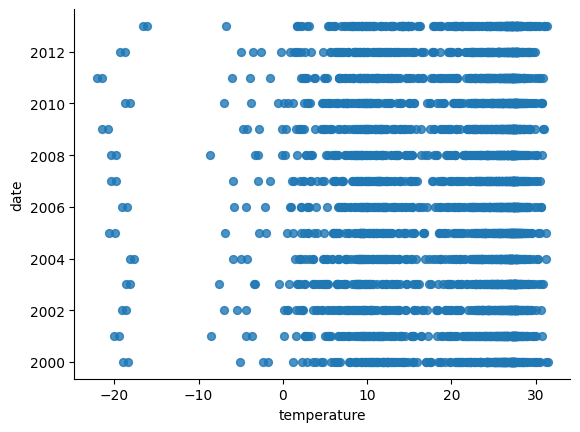

In [40]:
# @title temperature vs date
df_t_med.plot(kind='scatter', x='temperature', y='date', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Si queremos explorar un poco la composicion de temperaturas por pais, podemos utilizar un **boxplot**, herramienta muy util para encontrar la distribucion de las variables. Pero tenemos que hacer algunas modificaciones en nuestro dataframe.

In [41]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot.head(10)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
2000,18.4400,25.7280,14.4190,25.0170,27.3170,12.0950,22.7470,27.3540,27.1790,15.4380,...,17.4130,18.5910,25.4900,25.2170,27.1400,23.3010,29.3440,22.2540,22.6860,8.5570
2001,16.3620,25.8030,13.7490,25.3240,27.2835,12.6740,22.8960,27.5740,27.5020,15.4380,...,18.2560,13.8655,25.7300,25.3055,27.1430,23.2355,28.0270,22.1860,22.7205,5.6560
2002,16.4970,25.7410,12.5335,23.8485,27.7370,11.8895,23.4880,27.7745,27.5745,15.5300,...,18.2875,13.8335,25.7840,25.0420,27.5530,23.0610,27.3385,23.1025,23.1010,3.9725
2003,15.4800,26.0325,12.1450,25.3615,27.0420,11.1290,23.4450,27.6205,27.5225,15.6955,...,17.6225,13.4725,26.0055,25.2690,27.3325,23.8755,27.6280,22.9690,22.8095,4.9515
2004,14.6700,25.7840,13.6610,24.8325,27.3035,11.3525,23.2425,27.1515,27.0755,15.7490,...,18.1710,12.4375,25.7210,24.6615,26.8635,23.1790,27.6495,22.4920,22.1475,5.8705
2005,15.5190,26.0680,12.4485,25.3350,27.4560,12.0625,23.1205,28.0185,27.8795,14.4385,...,16.6670,14.4225,25.8770,24.9820,27.7440,24.0055,27.4135,22.9420,22.9180,6.4785
2006,16.6300,25.9285,13.6685,25.7525,26.9235,13.2795,22.4780,27.9425,27.7930,16.0645,...,18.8200,15.3440,25.8240,25.4795,27.7405,23.7470,27.4390,22.2425,22.0520,6.5160
2007,15.4785,25.6990,13.1770,24.3050,27.4810,12.3455,22.9140,27.8245,27.4715,15.9405,...,18.9395,13.8395,25.6715,24.5150,27.4890,23.0445,27.6570,22.2380,22.9095,6.2955
2008,16.3810,25.6660,13.2985,24.4435,27.0560,11.1975,22.2545,27.3630,27.1830,15.3035,...,17.8770,14.6835,25.5875,25.2840,27.1525,24.2500,27.4595,21.5855,22.4170,6.5450


<Axes: >

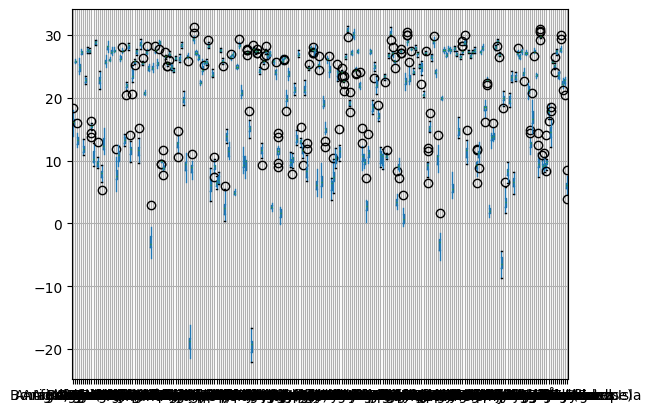

In [42]:
df_t_pivot.boxplot()

La grafica esta llena de puntos y debido a que son mucho paises, es dificil de interpretar la grafica.  Lo que podemos hacer es seleccionar una determinada cantidad de paises para poder hacer una mejor interpretacion. Seleccionemos paises aleatorios con **sample**

In [43]:
df_t_pivot.sample(5)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
2009,13.8930,25.8935,13.1795,23.7635,26.9025,11.6925,22.5965,27.6000,27.4565,16.390,...,17.9630,12.2385,26.0265,25.1260,27.2885,23.0090,27.5515,22.1360,22.4860,5.5765
2000,18.4400,25.7280,14.4190,25.0170,27.3170,12.0950,22.7470,27.3540,27.1790,15.438,...,17.4130,18.5910,25.4900,25.2170,27.1400,23.3010,29.3440,22.2540,22.6860,8.5570
2002,16.4970,25.7410,12.5335,23.8485,27.7370,11.8895,23.4880,27.7745,27.5745,15.530,...,18.2875,13.8335,25.7840,25.0420,27.5530,23.0610,27.3385,23.1025,23.1010,3.9725
2001,16.3620,25.8030,13.7490,25.3240,27.2835,12.6740,22.8960,27.5740,27.5020,15.438,...,18.2560,13.8655,25.7300,25.3055,27.1430,23.2355,28.0270,22.1860,22.7205,5.6560
2012,15.6755,25.5670,13.9060,24.5915,27.1620,11.5065,22.3530,27.8255,27.6260,15.487,...,17.9600,16.6915,25.7590,25.5770,27.5920,23.6175,27.8575,22.4530,23.0455,6.2540


In [44]:
df_t_pivot.T.sample(2)

date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,
Macau,25.368,23.8925,24.233,24.244,23.5005,24.1445,24.5890,23.2190,24.0770,23.5035,22.635,23.4870,24.3655,24.097
Dominican Republic,26.143,26.0925,26.820,26.816,26.0005,26.7300,26.9745,26.3255,26.1715,26.3960,26.746,26.2225,26.6325,26.965


Como vemos se han seleccionados aleatoriamente los años y no los paises. Lo que podemos hacer antes es una transpuesta de nuestro dataframe, seleccionar aleatoriamente los paises y luego transponer nuevamente.

In [45]:
df_t_pivot.T.sample(5).T.head(5)

Country,Taiwan,Laos,Mali,Kingman Reef,Samoa
date,,,,,
2000,24.2850,25.2590,31.4380,27.5140,26.9080
2001,22.9645,25.3925,30.7610,27.8025,27.0640
2002,23.9110,24.9245,30.6700,28.0895,27.4390
2003,23.3250,25.3265,30.8190,28.1110,26.9445
2004,22.5075,24.7845,31.1675,27.9860,27.1080


Sobre los datos anteriores obtengamos las graficas. Tengamos en cuenta que cada vez que corramos la linea de codigo se seleccionaran nuevamente los paises de forma aleatoria.

<Axes: >

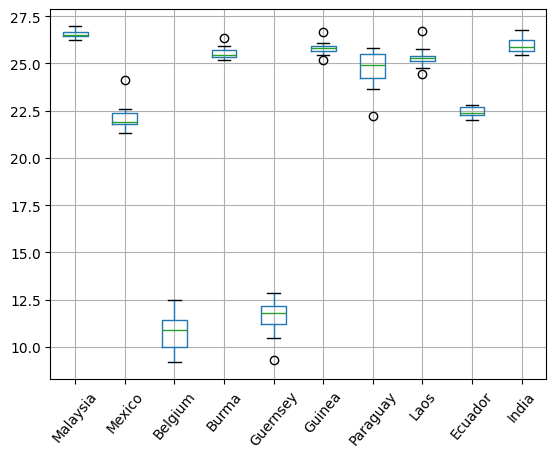

In [46]:
df_t_pivot.T.sample(10).T.boxplot(rot=50)

Lo que vemos es como a traves de un preprocesamiento y ordenamiento de las variables podemos extraer estadisticas de nuestra base de datos.

En base  a lo expuesto entendemos como ha variado la temperatura en los ultimos años en los distintos paises. Y Gracias a los boxplot podemos ver como la temperatura difiere dependiendo el pais en sí.



------------------------------------------------------------------


**VARIANZA**
   Aca trabajaremos con los datos para calcular y graficar la VARIENZA

In [47]:
df_v = pd.read_csv('GlobalLandTemperaturesByCountry.csv', skiprows=4)

In [48]:
df_v.head()

,1744-02-01,Unnamed: 1,Unnamed: 2,Åland
0,1744-03-01,NaN,NaN,Åland
1,1744-04-01,1.530,4.680,Åland
2,1744-05-01,6.702,1.789,Åland
3,1744-06-01,11.609,1.577,Åland
4,1744-07-01,15.342,1.410,Åland


Filtramos el rango de años y eliminamos columnas que no son de años. Para calcular la varianza por país y año, necesitamos agrupar por país y el año extraído de la columna "year".

In [49]:
years = [str(y) for y in range(2000, 2013)]
# Eliminamos columnas que no son de años
df_var = df_temp[['Country', 'year', 'AverageTemperature']].copy()

# Para calcular la varianza por país y año, necesitamos agrupar por país y el año extraído de la columna "year".
# Debemos asegurarnos de considerar solo hasta 2013.
df_var = df_temp[df_temp['year'].dt.year <= 2013].copy()

# Calcular la varianza de la temperatura media de cada país a lo largo de estos años
df_var = df_var.groupby('Country')['AverageTemperature'].var().reset_index()

# Renombrar la columna a 'Variance' para clarificar
df_var.rename(columns={'AverageTemperature': 'Variance'}, inplace=True)

# Muestra los resultados del DataFrame con la varianza por
print(df_var.head())


          Country   Variance
0     Afghanistan  86.911338
1          Africa   2.994500
2         Albania  51.697647
3         Algeria  61.436159
4  American Samoa   0.235257


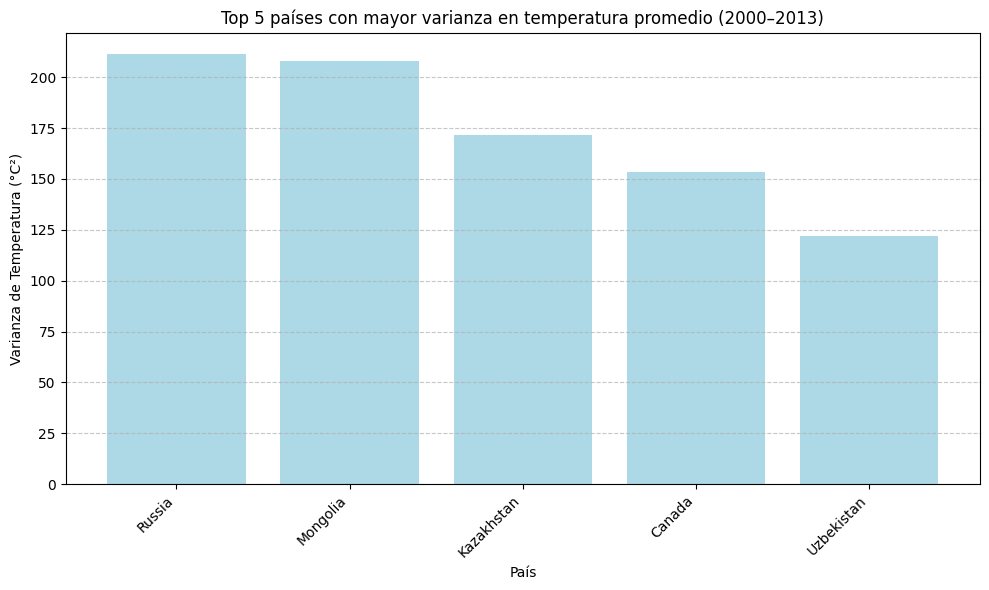

In [50]:
# Ordenar por varianza descendente y seleccionar los 10 primeros
top_var = df_var.sort_values(by='Variance', ascending=False).head(5)
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_var['Country'], top_var['Variance'], color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 países con mayor varianza en temperatura promedio (2000–2013)')
plt.ylabel('Varianza de Temperatura (°C²)')
plt.xlabel('País')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**DESVÍO ESTANDAR**
   Aca trabajaremos con los datos para calcular y graficar la DESVIÓ ESTANDAR

In [51]:
df_v = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp = df_v.copy()
df_temp['dt'] = pd.to_datetime(df_temp['dt'])
df_temp['year'] = df_temp['dt'].dt.year

In [52]:
# Calcular desviación estándar por país (2000–2013)
df_std = df_temp[df_temp['year'] <= 2013].copy()
df_std = df_std.groupby('Country')['AverageTemperature'].std().reset_index()
df_std.rename(columns={'AverageTemperature': 'StdDev'}, inplace=True)

In [53]:
# Ordenar por desviación estándar descendente y seleccionar los 10 primeros
top_std = df_std.sort_values(by='StdDev', ascending=False).head(5)

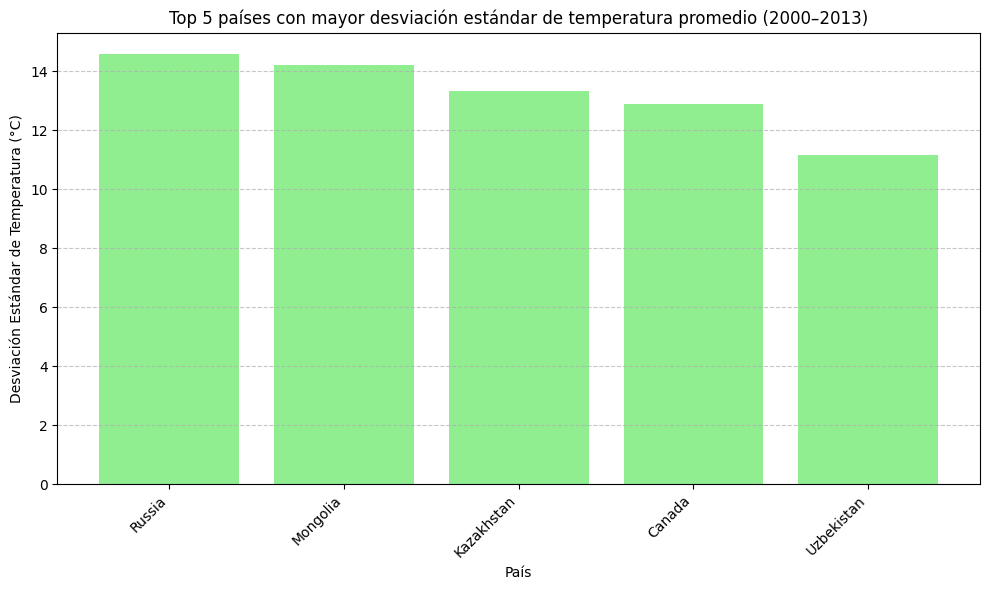

In [54]:
# Crear el gráfico de barras para desviación estándar
plt.figure(figsize=(10, 6))
plt.bar(top_std['Country'], top_std['StdDev'], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 países con mayor desviación estándar de temperatura promedio (2000–2013)')
plt.ylabel('Desviación Estándar de Temperatura (°C)')
plt.xlabel('País')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Distribución de la desviación estándar de la temperatura promedio por país durante el período 2000–2013.**

Habiendo ya calculado la desviació estándar de todos los paises, en el rango de años indicado entre 2000 y 2013, tambien podemos obtener estadisticas de cantidad de países que cuentan con desviacion de temperaturas similares. Gráficamente lo representaremos en un gráfico de histograma.

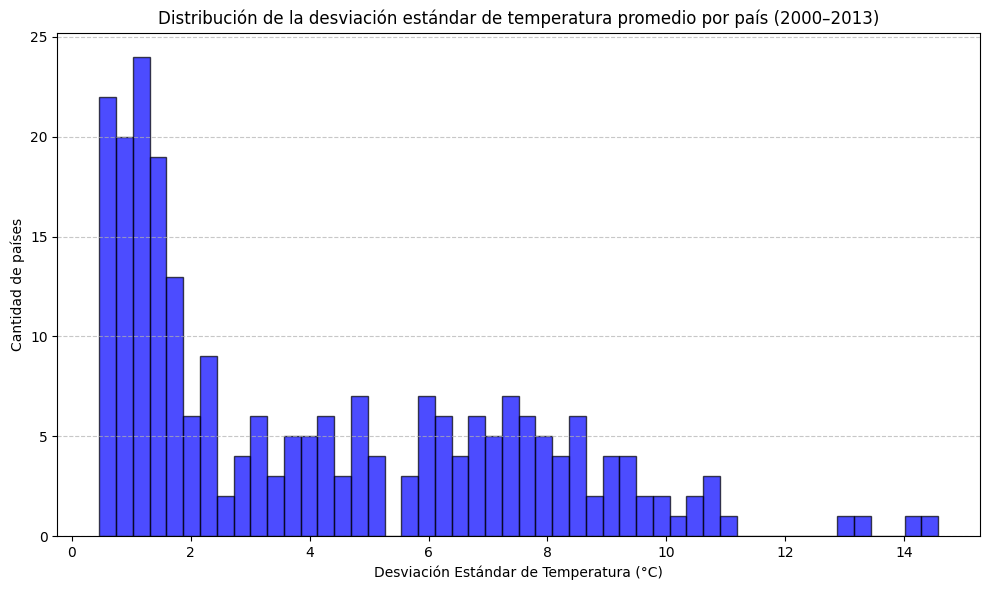

In [55]:
# Crear histograma de las desviaciones estándar de temperatura de todos los países
plt.figure(figsize=(10, 6))
# para hacer entendible el gráfico tomamos una cantidad de 50 paises
plt.hist(df_std['StdDev'], bins=50, color='blue',edgecolor='black', alpha=0.7)
plt.title('Distribución de la desviación estándar de temperatura promedio por país (2000–2013)')
plt.xlabel('Desviación Estándar de Temperatura (°C)')
plt.ylabel('Cantidad de países')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**MUESTREO**

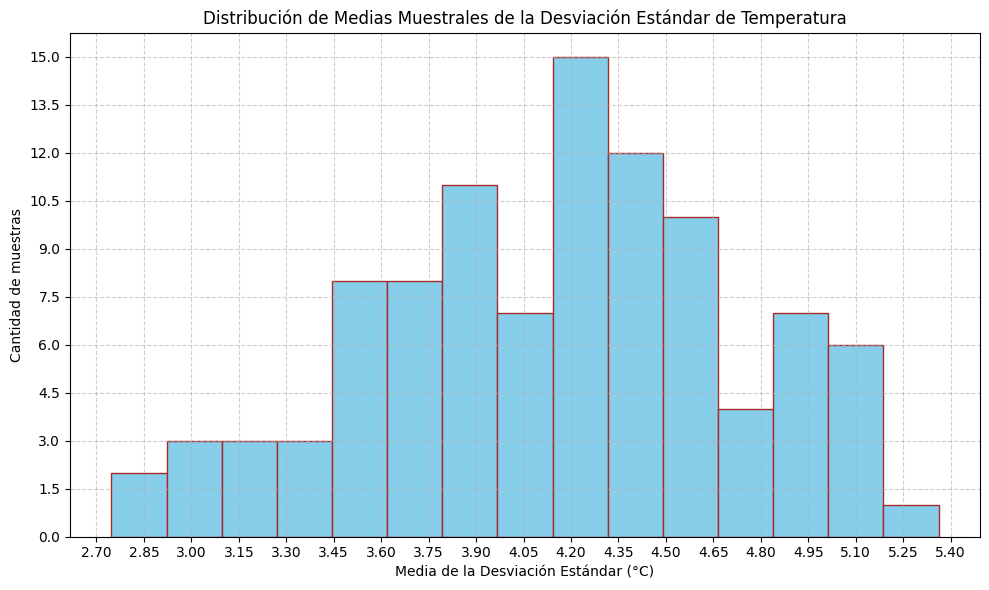

In [85]:
from matplotlib.ticker import MaxNLocator
# Extraer los valores de desviación estándar
valores = df_std['StdDev'].dropna().values

# Lista para guardar las medias de cada muestra
medias_muestras = []

# Realizar 100 muestreos aleatorios con reemplazo, tamaño de muestra = 30
for _ in range(100):
    muestra = np.random.choice(valores, size=30, replace=True)
    media_muestra = np.mean(muestra)
    medias_muestras.append(media_muestra)

# Graficar la distribución de las medias muestrales
plt.figure(figsize=(10, 6))
plt.hist(medias_muestras, bins=15, color='skyblue', edgecolor='brown')
plt.title('Distribución de Medias Muestrales de la Desviación Estándar de Temperatura')
plt.xlabel('Media de la Desviación Estándar (°C)')
plt.ylabel('Cantidad de muestras')

# Divisiones en los ejes
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=15))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()